In [123]:
import numpy as np ###오차 행렬 계산용
import pandas as pd ###시각화 - 판다스
import seaborn as sns ###시각화 - 씨본
import matplotlib.pylab as plt ### 그래프 라이브러리
%matplotlib inline

from sklearn.model_selection import cross_val_score #교차검증
from sklearn.metrics import make_scorer ###교차검증 평가 기준 바꾸기
from sklearn.model_selection import train_test_split ###데이터 자르는
from sklearn.metrics import accuracy_score ###정답률 보기
from sklearn import metrics ## 오차 행렬 만들기용
from sklearn.preprocessing import StandardScaler ### 스캐일링 메서드
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error ### 평균 제곱 오차

from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC #소프트벡터머신
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #랜덤포레스트
from sklearn.linear_model import Ridge #규제를 위한  Ridge(비율로 규제) L2
from sklearn.linear_model import Lasso #규제를 위한 Lasso(같은 값으로 규제) L1
from sklearn.neighbors import KNeighborsRegressor ### KNM 회귀모델
from sklearn.neighbors import KNeighborsClassifier # 선형분류
from sklearn.preprocessing import MinMaxScaler # MinMax 스케일링

from sklearn.tree import DecisionTreeClassifier # 결정트리
from sklearn.cluster import KMeans # kmeans 분류
from sklearn.cluster import KMeans,DBSCAN
from xgboost import XGBClassifier # 랜덤포레스트와 xgboost의 단점을 보완
from tqdm import tqdm_notebook # 퍼센트 보여주는 것
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 깨짐 방지

from sklearn.preprocessing import MinMaxScaler, RobustScaler # MinMax 스케일링

In [124]:
data = pd.read_csv('과일 9개날씨데이터(new).csv', encoding='utf-8')
data

,지역,세부지역,좌표,년,월,Total Monthly Precipitation (in millimeters)(강수량),Mean Daily Air Temperature (in deg Celsius) 평균 일일 공기 온도(도),Mean Daily Minimum Air Temperature (in deg Celsius) 일일최소 온도(도),Mean Daily Maximum Air Temperature (in deg Celsius) 일일최대 온도(도),Regosol,...,Lithosols,Gleysols,Phaeozems,Ferralsols,Luvisol,Histosols,Acrisols,Andosols,Outcrops,과일
0,멕시코,MANZANILLO,"19.117329, -104.336101",2007,1,2.1,25.8,22.0,30.5,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
1,멕시코,MANZANILLO,"19.117329, -104.336101",2008,1,0.0,24.3,19.8,30.0,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
2,멕시코,MANZANILLO,"19.117329, -104.336101",2009,1,0.0,25.5,21.7,30.3,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
3,멕시코,MANZANILLO,"19.117329, -104.336101",2010,1,47.9,25.4,21.5,30.3,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
4,멕시코,MANZANILLO,"19.117329, -104.336101",2011,1,0.0,23.0,18.5,29.0,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
5,멕시코,MANZANILLO,"19.117329, -104.336101",2012,1,57.8,24.0,20.9,30.0,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
6,멕시코,MANZANILLO,"19.117329, -104.336101",2013,1,213.5,25.7,21.8,30.3,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
7,멕시코,MANZANILLO,"19.117329, -104.336101",2014,1,2.7,25.6,21.6,30.5,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
8,멕시코,MANZANILLO,"19.117329, -104.336101",2015,1,0.0,26.2,22.6,31.5,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도
9,멕시코,MANZANILLO,"19.117329, -104.336101",2016,1,14.8,25.9,19.6,33.7,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,아보카도


In [125]:
data = data[(data['과일'] == '아보카도') | (data['과일'] == '올리브') | (data['과일'] == '패션후르츠') | (data['과일'] == '파파야') | (data['과일'] == '망고')]

In [126]:
X = data.iloc[:,5:25]
y = data.iloc[:,-1]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y, test_size = 0.3)

In [128]:
rs = RobustScaler()

In [129]:
rs.fit(X_train)
X_train_sc = rs.transform(X_train)
X_test_sc = rs.transform(X_test)

In [130]:
X_train_sc = pd.DataFrame(X_train_sc, columns= X_train.columns)

In [131]:
X_train_sc

,Total Monthly Precipitation (in millimeters)(강수량),Mean Daily Air Temperature (in deg Celsius) 평균 일일 공기 온도(도),Mean Daily Minimum Air Temperature (in deg Celsius) 일일최소 온도(도),Mean Daily Maximum Air Temperature (in deg Celsius) 일일최대 온도(도),Regosol,Cambisol,Fluvisol,Arenosols,Solonchak,Rendzina,Podzols,Lithosols,Gleysols,Phaeozems,Ferralsols,Luvisol,Histosols,Acrisols,Andosols,Outcrops
0,2.121785,-0.545455,-0.563107,-0.354680,0.000000,2.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,0.151181,-0.103896,-0.067961,-0.256158,0.000000,0.0,0.0,0.0,0.0,0.0,0.3,0.00,0.6,0.00,0.00,0.0,0.1,0.0,0.0,0.0
2,0.466142,-1.909091,-1.660194,-2.502463,0.000000,0.5,0.8,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,1.320735,0.779221,0.601942,1.064039,0.000000,0.0,0.0,0.0,0.0,0.0,0.3,0.00,0.6,0.00,0.00,0.0,0.1,0.0,0.0,0.0
4,-0.325459,0.285714,-0.330097,1.458128,0.000000,0.5,0.8,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
5,-0.087139,0.337662,0.349515,0.236453,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.0
6,0.346457,-0.623377,-0.796117,-0.354680,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
7,1.545407,0.636364,0.601942,0.906404,1.133333,0.8,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
8,0.277165,-0.025974,0.058252,-0.275862,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.33,0.33,0.0,0.0,0.0,0.0,0.0
9,-0.325459,-0.896104,-1.106796,-0.669951,0.000000,2.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [132]:
X_test_sc = pd.DataFrame(X_test_sc, columns= X_train.columns)
X_test_sc

,Total Monthly Precipitation (in millimeters)(강수량),Mean Daily Air Temperature (in deg Celsius) 평균 일일 공기 온도(도),Mean Daily Minimum Air Temperature (in deg Celsius) 일일최소 온도(도),Mean Daily Maximum Air Temperature (in deg Celsius) 일일최대 온도(도),Regosol,Cambisol,Fluvisol,Arenosols,Solonchak,Rendzina,Podzols,Lithosols,Gleysols,Phaeozems,Ferralsols,Luvisol,Histosols,Acrisols,Andosols,Outcrops
0,-0.323360,-0.948052,-1.165049,-0.748768,0.000000,2.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,1.402625,-1.194805,-1.009709,-1.655172,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,-0.298163,-0.948052,-1.184466,-0.748768,0.000000,2.5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,0.075591,0.584416,0.368932,1.497537,1.133333,0.8,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,0.254068,0.298701,0.262136,0.512315,1.133333,0.8,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
5,0.043045,-0.350649,-0.563107,-0.019704,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
6,-0.258268,0.467532,0.368932,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.33,0.33,0.0,0.0,0.0,0.0,0.0
7,-0.322310,0.077922,0.135922,-0.118227,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.33,0.33,0.0,0.0,0.0,0.0,0.0
8,1.113911,0.714286,0.621359,1.004926,1.133333,0.8,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
9,0.529134,-1.090909,-0.883495,-1.596059,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# LogisticRegression

In [133]:
lr=LogisticRegression(C=0.1,solver='lbfgs',max_iter=100000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\pc-05\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9880952380952381

In [134]:
y_pred = lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          망고       1.00      1.00      1.00        36
        아보카도       0.97      0.99      0.98        72
         올리브       1.00      1.00      1.00        36
         파파야       1.00      0.94      0.97        36
       패션후르츠       0.99      1.00      0.99        72

   micro avg       0.99      0.99      0.99       252
   macro avg       0.99      0.99      0.99       252
weighted avg       0.99      0.99      0.99       252



# Support vector machine

In [135]:
for i in [0.001,0.01,0.1,1,10,100,1000]:
    svm=LinearSVC(C=i,max_iter=1000000)
    score=cross_val_score(svm, X_train_sc, y_train,cv=5).mean()
    print('c: ',i,'일 때',score)

c:  0.001 일 때 0.901097286509471
c:  0.01 일 때 0.9983050847457626
c:  0.1 일 때 1.0
c:  1 일 때 1.0
c:  10 일 때 1.0
c:  100 일 때 1.0
c:  1000 일 때 1.0


In [136]:
svm=LinearSVC(C=0.01,max_iter=1000000)
svm.fit(X_train_sc, y_train)
svm.score(X_test_sc,y_test)

1.0

In [137]:
y_pred = svm.predict(X_test_sc)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          망고       1.00      1.00      1.00        36
        아보카도       1.00      1.00      1.00        72
         올리브       1.00      1.00      1.00        36
         파파야       1.00      1.00      1.00        36
       패션후르츠       1.00      1.00      1.00        72

   micro avg       1.00      1.00      1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



# XGB

In [138]:
xgb=XGBClassifier()
xgb.fit(X_train_sc,y_train) 
xgb.score(X_test_sc, y_test)

1.0

In [139]:
y_pred = xgb.predict(X_test_sc)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          망고       1.00      1.00      1.00        36
        아보카도       1.00      1.00      1.00        72
         올리브       1.00      1.00      1.00        36
         파파야       1.00      1.00      1.00        36
       패션후르츠       1.00      1.00      1.00        72

   micro avg       1.00      1.00      1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [140]:
X_train_sc.columns

Index(['Total Monthly Precipitation\n (in millimeters)(강수량)',
       'Mean Daily Air Temperature\n (in deg Celsius) \n평균 일일 공기 온도(도)',
       'Mean Daily Minimum Air Temperature\n (in deg Celsius) \n 일일최소 온도(도)',
       'Mean Daily Maximum Air Temperature\n (in deg Celsius)  \n일일최대 온도(도)',
       'Regosol', 'Cambisol', 'Fluvisol', 'Arenosols', 'Solonchak', 'Rendzina',
       'Podzols', 'Lithosols', 'Gleysols', 'Phaeozems', 'Ferralsols',
       'Luvisol', 'Histosols', 'Acrisols', 'Andosols', 'Outcrops'],
      dtype='object')

In [141]:
data_columns = ['Total Monthly Precipitation\n (in millimeters)(강수량)',
       'Mean Daily Air Temperature\n (in deg Celsius) \n평균 일일 공기 온도(도)',
       'Mean Daily Minimum Air Temperature\n (in deg Celsius) \n 일일최소 온도(도)',
       'Mean Daily Maximum Air Temperature\n (in deg Celsius)  \n일일최대 온도(도)','과일']

In [142]:
prediction = svm.predict(X_test_sc)
prediction

array(['파파야', '올리브', '파파야', '아보카도', '아보카도', '아보카도', '패션후르츠', '패션후르츠',
       '아보카도', '올리브', '파파야', '아보카도', '아보카도', '아보카도', '망고', '파파야', '파파야',
       '아보카도', '아보카도', '파파야', '올리브', '파파야', '아보카도', '망고', '아보카도', '아보카도',
       '올리브', '망고', '아보카도', '망고', '올리브', '파파야', '아보카도', '패션후르츠', '패션후르츠',
       '망고', '망고', '아보카도', '망고', '패션후르츠', '망고', '파파야', '망고', '패션후르츠',
       '아보카도', '올리브', '아보카도', '파파야', '아보카도', '아보카도', '망고', '망고', '패션후르츠',
       '망고', '아보카도', '망고', '패션후르츠', '패션후르츠', '패션후르츠', '망고', '망고', '아보카도',
       '아보카도', '파파야', '패션후르츠', '올리브', '파파야', '올리브', '아보카도', '아보카도',
       '패션후르츠', '패션후르츠', '올리브', '파파야', '패션후르츠', '아보카도', '패션후르츠', '올리브',
       '패션후르츠', '패션후르츠', '올리브', '올리브', '파파야', '패션후르츠', '아보카도', '올리브',
       '패션후르츠', '아보카도', '아보카도', '아보카도', '파파야', '망고', '패션후르츠', '파파야',
       '패션후르츠', '패션후르츠', '패션후르츠', '패션후르츠', '패션후르츠', '아보카도', '아보카도', '망고',
       '아보카도', '올리브', '패션후르츠', '망고', '패션후르츠', '패션후르츠', '망고', '올리브', '파파야',
       '망고', '패션후르츠', '올리브', '파파야', '아보카도', '파파야', '올리브', '올리브'

In [143]:
X_test_sc['과일'] = prediction

In [144]:
X_test_sc

,Total Monthly Precipitation (in millimeters)(강수량),Mean Daily Air Temperature (in deg Celsius) 평균 일일 공기 온도(도),Mean Daily Minimum Air Temperature (in deg Celsius) 일일최소 온도(도),Mean Daily Maximum Air Temperature (in deg Celsius) 일일최대 온도(도),Regosol,Cambisol,Fluvisol,Arenosols,Solonchak,Rendzina,...,Lithosols,Gleysols,Phaeozems,Ferralsols,Luvisol,Histosols,Acrisols,Andosols,Outcrops,과일
0,-0.323360,-0.948052,-1.165049,-0.748768,0.000000,2.5,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,파파야
1,1.402625,-1.194805,-1.009709,-1.655172,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,올리브
2,-0.298163,-0.948052,-1.184466,-0.748768,0.000000,2.5,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,파파야
3,0.075591,0.584416,0.368932,1.497537,1.133333,0.8,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,아보카도
4,0.254068,0.298701,0.262136,0.512315,1.133333,0.8,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,아보카도
5,0.043045,-0.350649,-0.563107,-0.019704,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,아보카도
6,-0.258268,0.467532,0.368932,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.34,0.0,0.33,0.33,0.0,0.0,0.0,0.0,0.0,패션후르츠
7,-0.322310,0.077922,0.135922,-0.118227,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.34,0.0,0.33,0.33,0.0,0.0,0.0,0.0,0.0,패션후르츠
8,1.113911,0.714286,0.621359,1.004926,1.133333,0.8,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,아보카도
9,0.529134,-1.090909,-0.883495,-1.596059,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,올리브


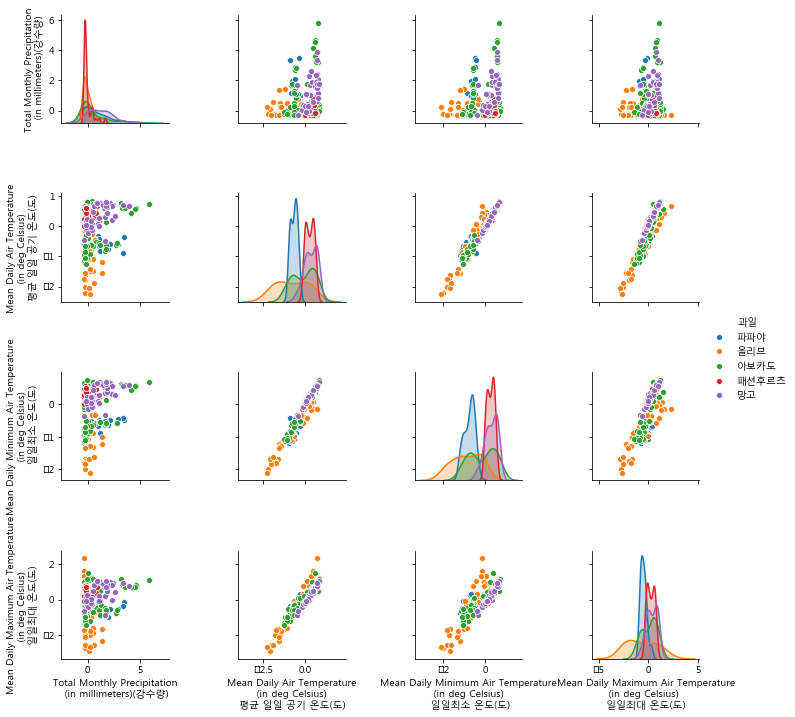

In [145]:
sns.pairplot(X_test_sc[data_columns], hue = '과일')

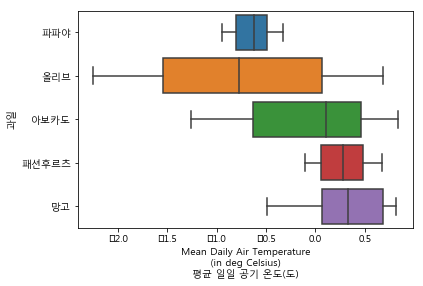

In [146]:
sns.boxplot(x = 'Mean Daily Air Temperature\n (in deg Celsius) \n평균 일일 공기 온도(도)', y = '과일', data = X_test_sc)

In [147]:
k_weather = pd.read_csv('K_weather(17~19).csv', encoding = 'euc-kr')
k_weather = k_weather.iloc[:,2:]

In [148]:
rs.fit(X_train) # X_train??? k_weather???
k_weather_sc = rs.transform(k_weather)

In [149]:
k_weather_sc = pd.DataFrame(k_weather_sc, columns=k_weather.columns)
k_weather_sc

,강수량,평균 일일 공기 온도(도),일일최소 온도(도),일일최대 온도(도),Regosol,Cambisol,Fluvisol,Arenosols,Solonchak,Rendzina,Podzols,Lithosols,Gleysols,Phaeozems,Ferralsols,Luvisol,Histosols,Acrisols,Andosols,Outcrops
0,5.746982,0.350649,0.116505,1.438424,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.098163,0.129870,-0.543689,1.832512,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.821522,0.415584,-0.533981,2.088670,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.830446,0.493506,-0.339806,2.581281,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.739108,-0.103896,-0.776699,1.182266,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.482940,-0.545455,-1.135922,0.591133,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.494488,-0.818182,-1.524272,0.709360,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.108136,-0.142857,-0.961165,1.399015,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.203675,-0.558442,-1.262136,0.394089,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.167979,-0.610390,-1.611650,1.320197,0.000000,1.25,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
prediction = svm.predict(k_weather_sc)
k_weather_sc['과일'] = prediction
k_weather_sc

,강수량,평균 일일 공기 온도(도),일일최소 온도(도),일일최대 온도(도),Regosol,Cambisol,Fluvisol,Arenosols,Solonchak,Rendzina,...,Lithosols,Gleysols,Phaeozems,Ferralsols,Luvisol,Histosols,Acrisols,Andosols,Outcrops,과일
0,5.746982,0.350649,0.116505,1.438424,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
1,3.098163,0.129870,-0.543689,1.832512,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
2,1.821522,0.415584,-0.533981,2.088670,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
3,2.830446,0.493506,-0.339806,2.581281,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
4,0.739108,-0.103896,-0.776699,1.182266,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
5,0.482940,-0.545455,-1.135922,0.591133,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
6,2.494488,-0.818182,-1.524272,0.709360,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
7,0.108136,-0.142857,-0.961165,1.399015,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
8,0.203675,-0.558442,-1.262136,0.394089,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,파파야
9,-0.167979,-0.610390,-1.611650,1.320197,0.000000,1.25,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,올리브


In [151]:
data_columns = ['강수량', '평균 일일 공기 온도(도)', '일일최소 온도(도)', '일일최대 온도(도)','과일']

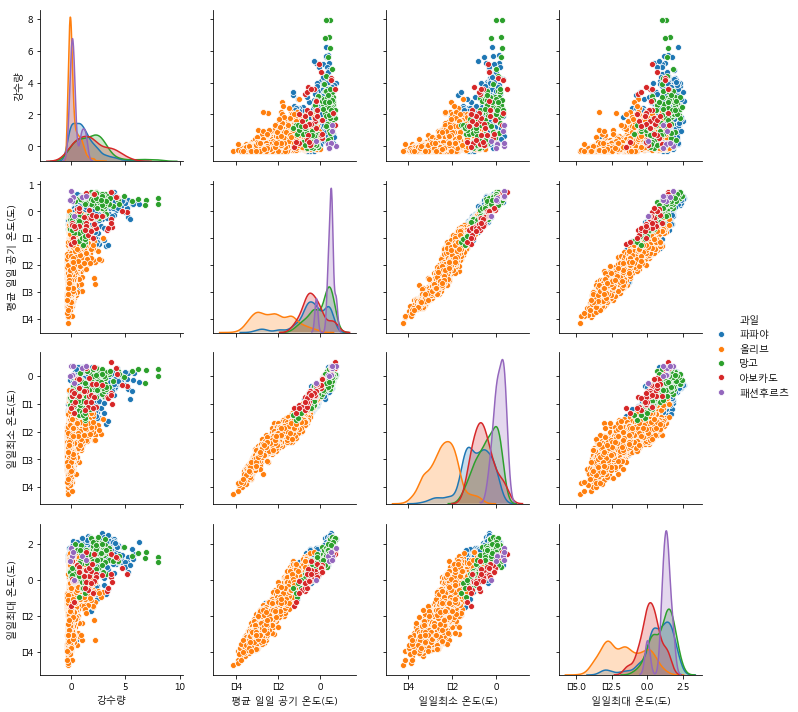

In [152]:
sns.pairplot(k_weather_sc[data_columns], hue = '과일')

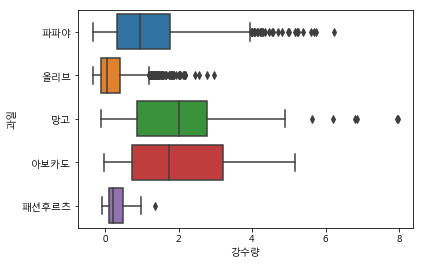

In [153]:
sns.boxplot(x = '강수량', y = '과일', data = k_weather_sc)

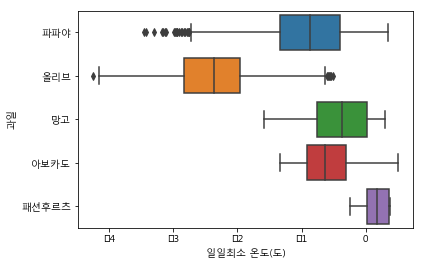

In [154]:
sns.boxplot(x = '일일최소 온도(도)', y = '과일', data = k_weather_sc)

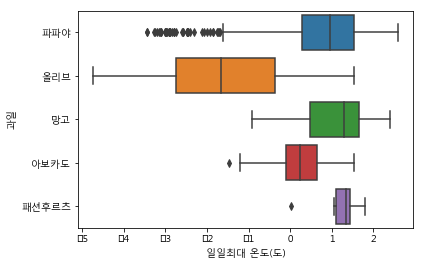

In [155]:
sns.boxplot(x = '일일최대 온도(도)', y = '과일', data = k_weather_sc)

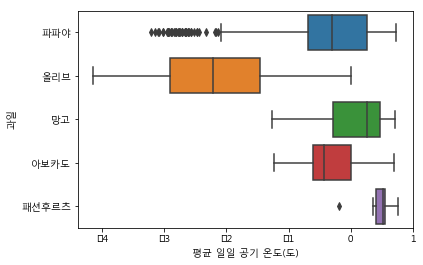

In [156]:
sns.boxplot(x = '평균 일일 공기 온도(도)', y = '과일', data = k_weather_sc)

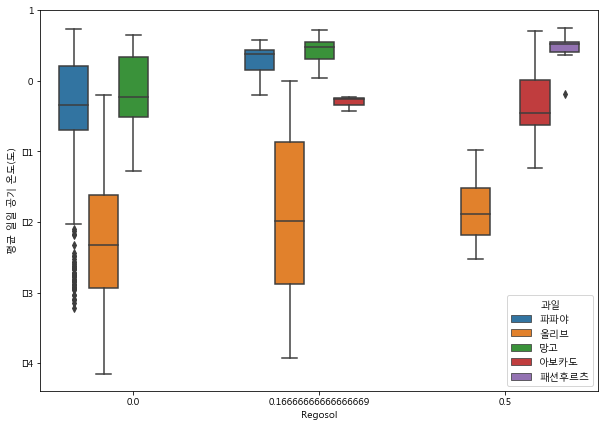

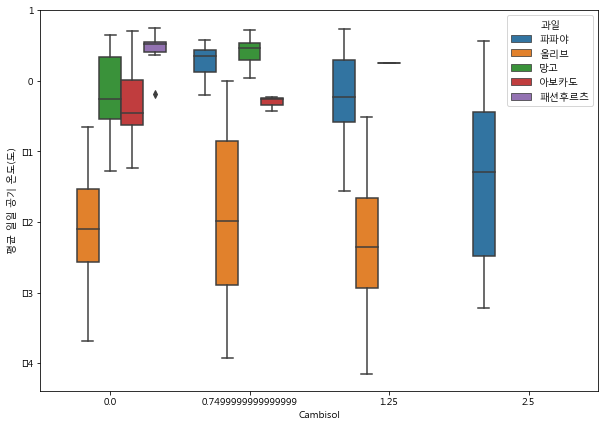

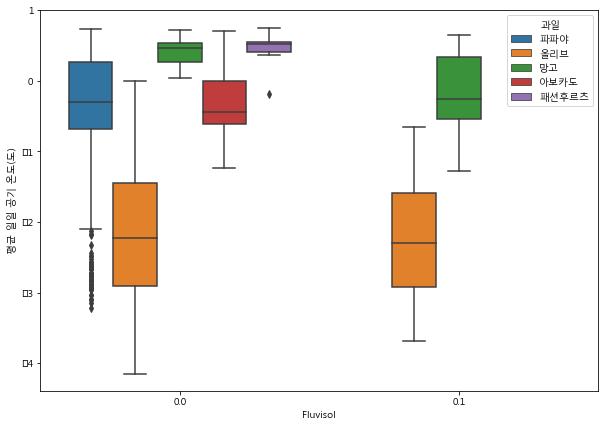

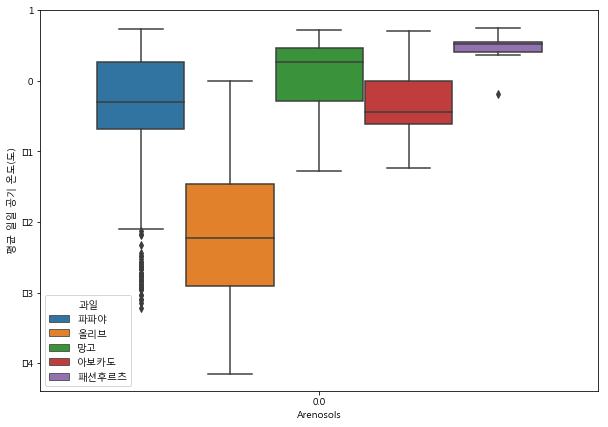

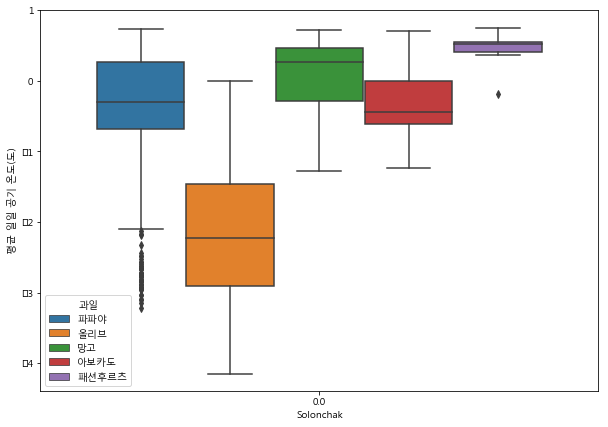

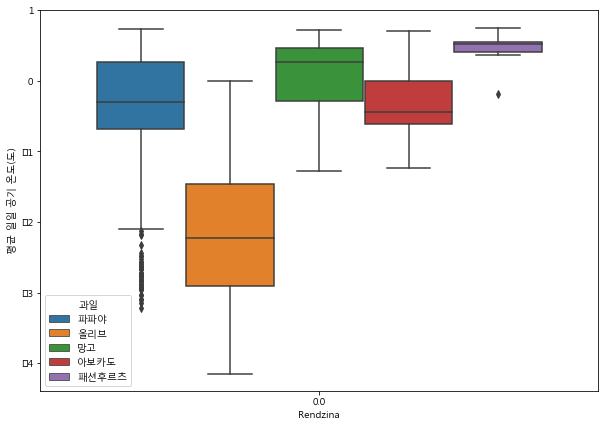

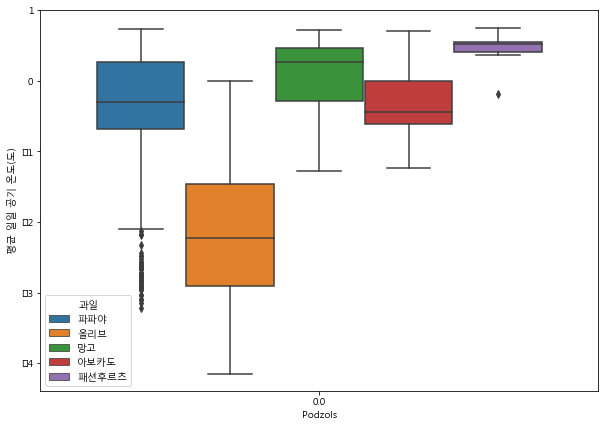

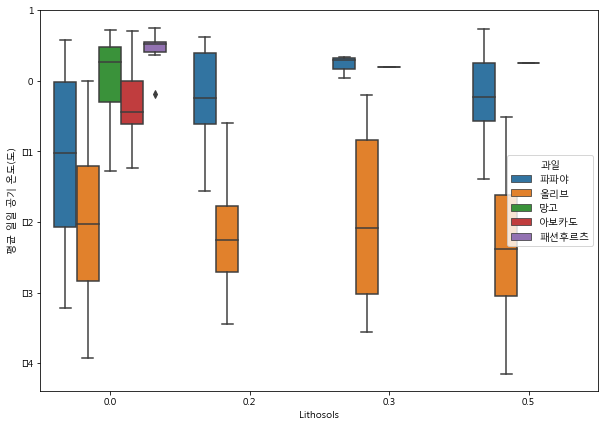

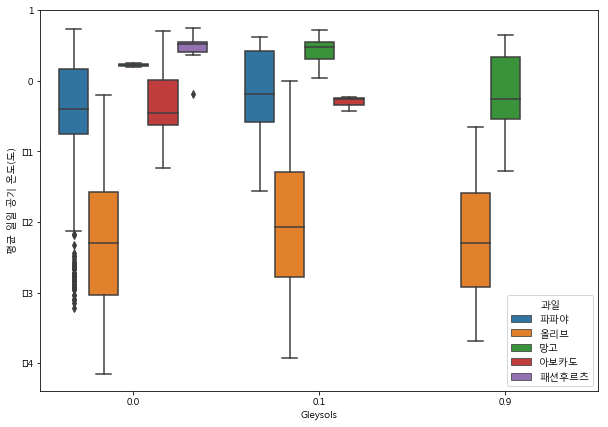

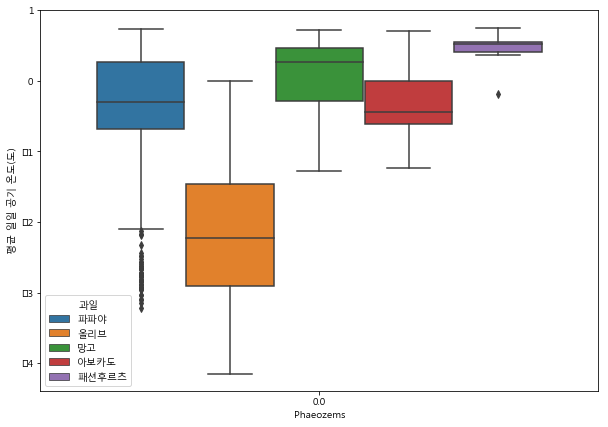

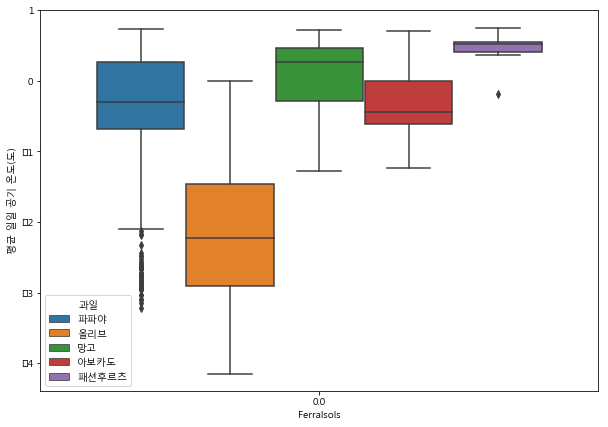

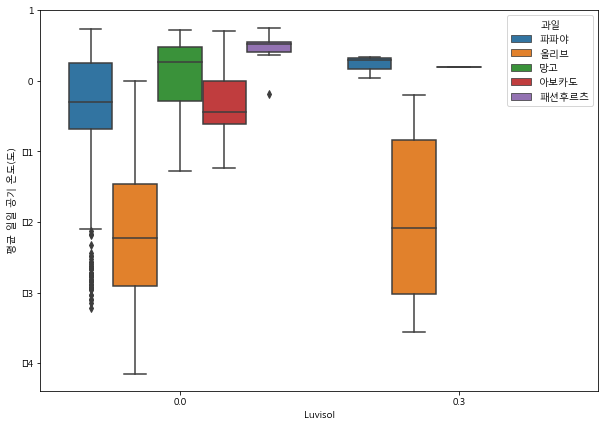

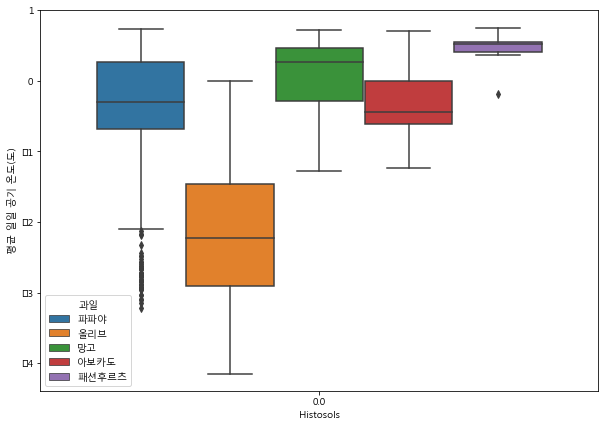

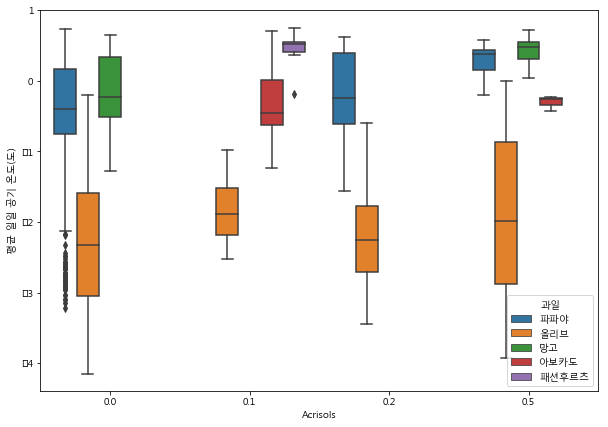

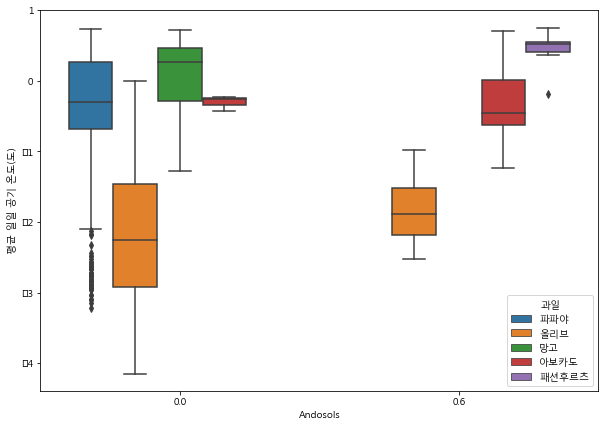

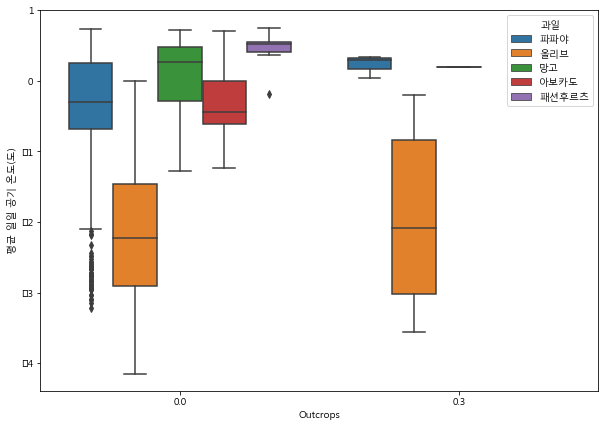

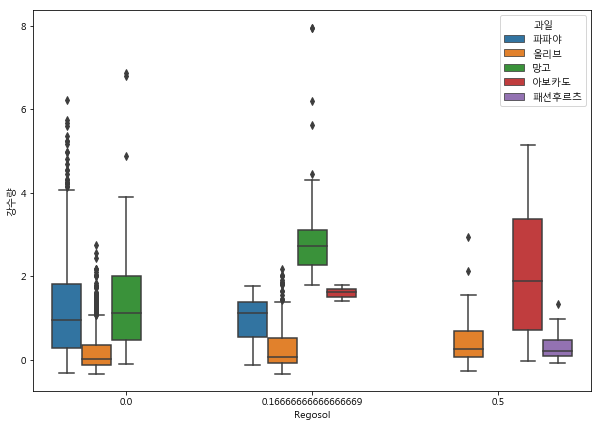

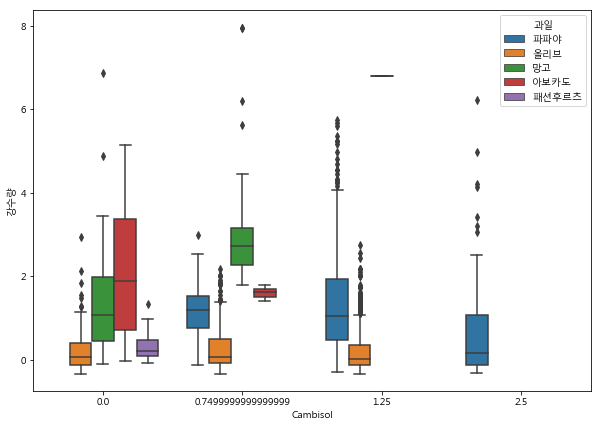

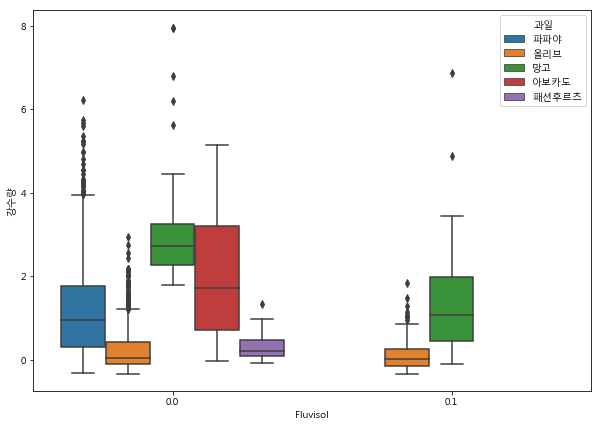

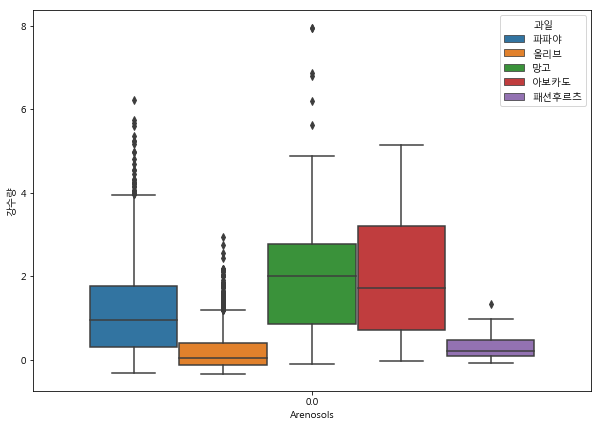

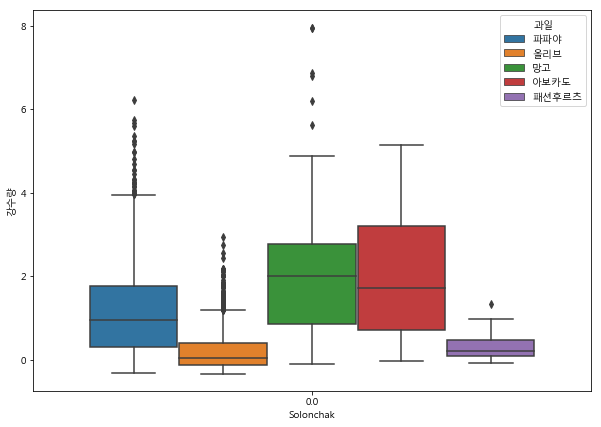

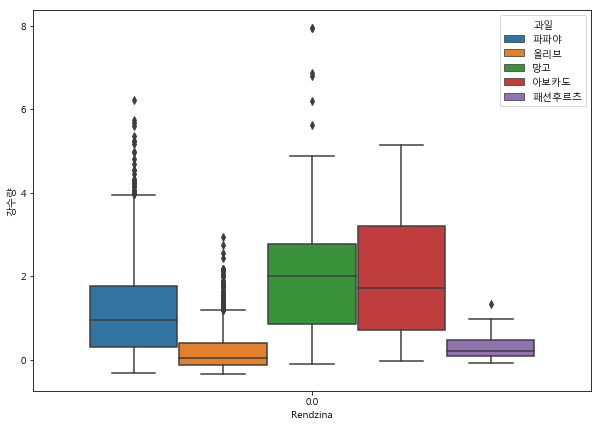

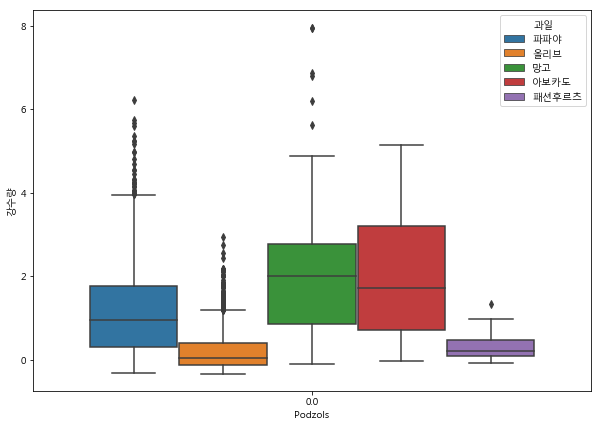

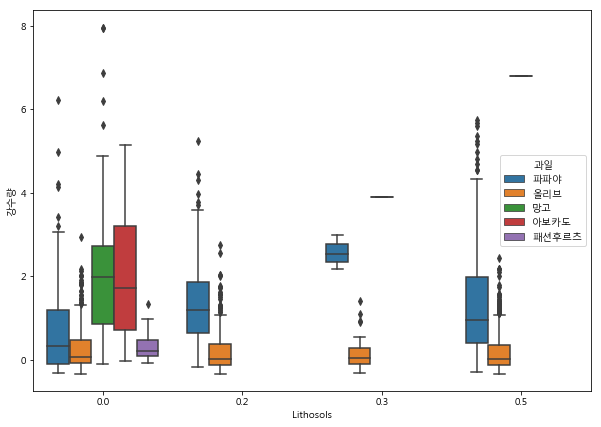

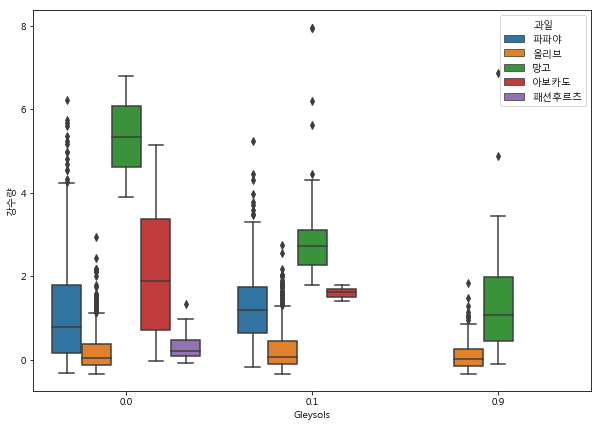

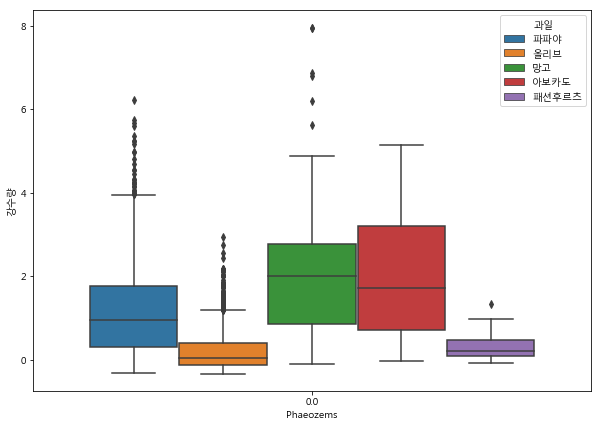

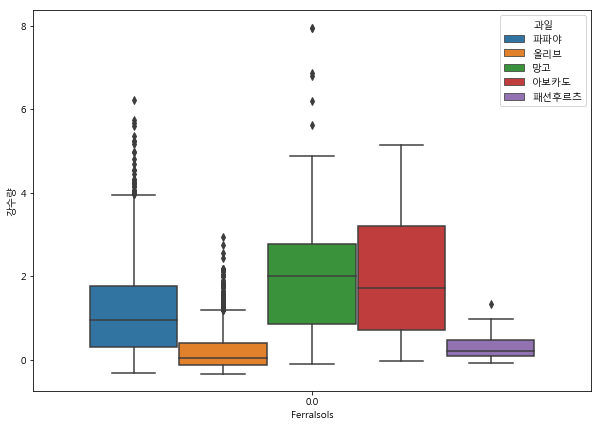

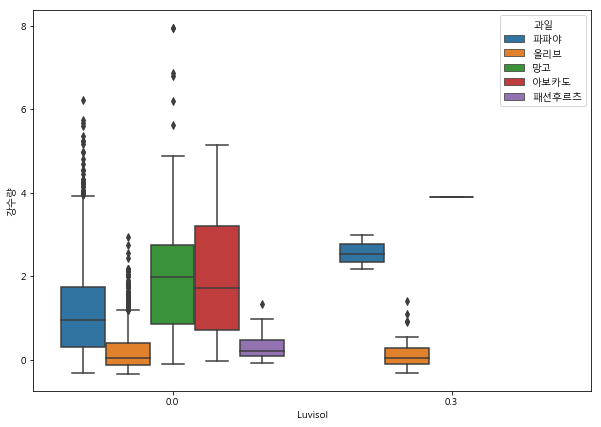

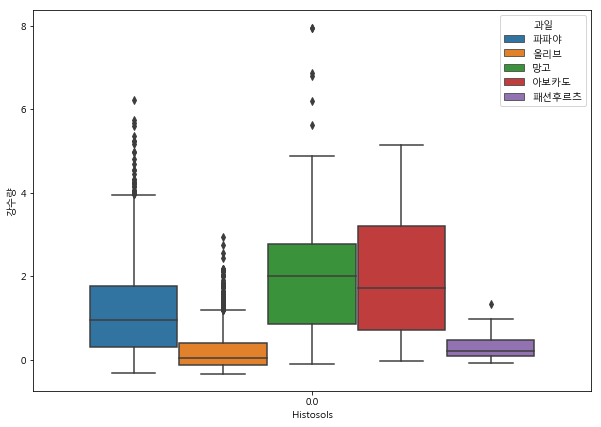

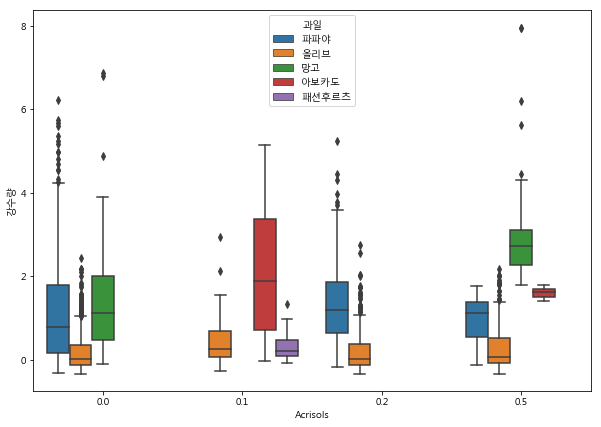

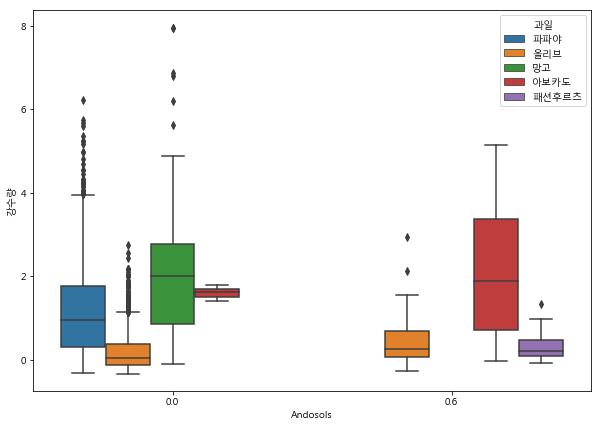

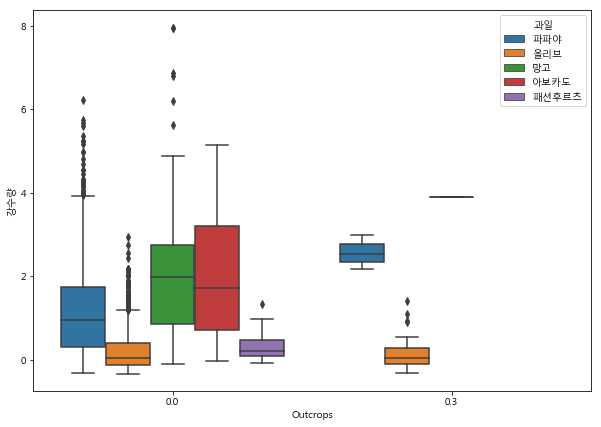

In [157]:
for x in ['평균 일일 공기 온도(도)', '강수량']:
    for column in k_weather_sc.columns[4:-1]:
        plt.figure(figsize=(10,7))
        sns.boxplot(x = column, y = x, hue='과일', data = k_weather_sc)
        plt.show()

In [158]:
k_weather_sc['Lithosols'].unique()

array([0.5, 0. , 0.2, 0.3])

In [159]:
k_weather_inversed = pd.concat([pd.DataFrame(rs.inverse_transform(k_weather_sc.iloc[:,:-1]), columns = k_weather_sc.columns.tolist()[:-1]), predSeries], axis=1)

In [160]:
predSeries = pd.Series(prediction,name = '과일')

In [161]:
for_columns = data.columns[5:10]
for_columns

Index(['Total Monthly Precipitation\n (in millimeters)(강수량)',
       'Mean Daily Air Temperature\n (in deg Celsius) \n평균 일일 공기 온도(도)',
       'Mean Daily Minimum Air Temperature\n (in deg Celsius) \n 일일최소 온도(도)',
       'Mean Daily Maximum Air Temperature\n (in deg Celsius)  \n일일최대 온도(도)',
       'Regosol'],
      dtype='object')

In [162]:
sns.boxplot?

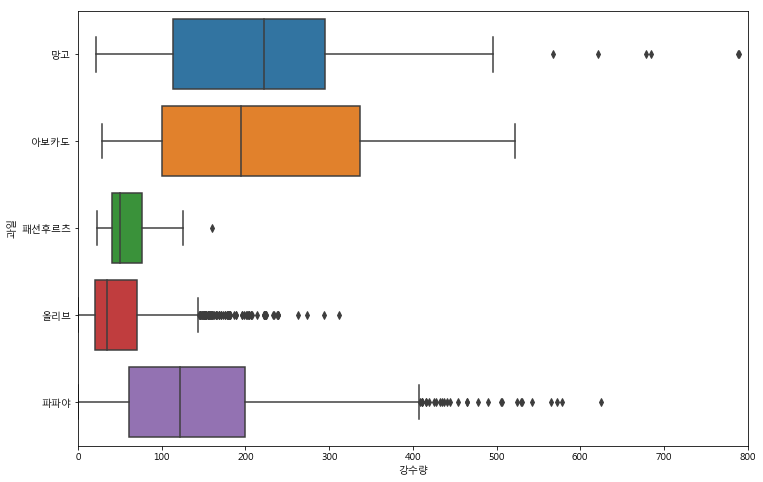

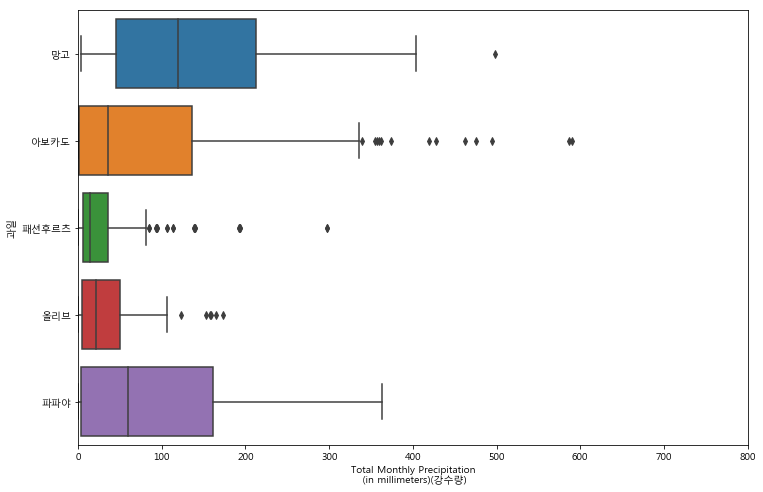

In [163]:
plt.figure(figsize = (12,8))
sns.boxplot(x = '강수량', y = '과일', data = k_weather_inversed, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(0, 800)
plt.show()
plt.figure(figsize = (12,8))
sns.boxplot(x = for_columns[0], y = '과일', data = data, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(0, 800)
plt.show()

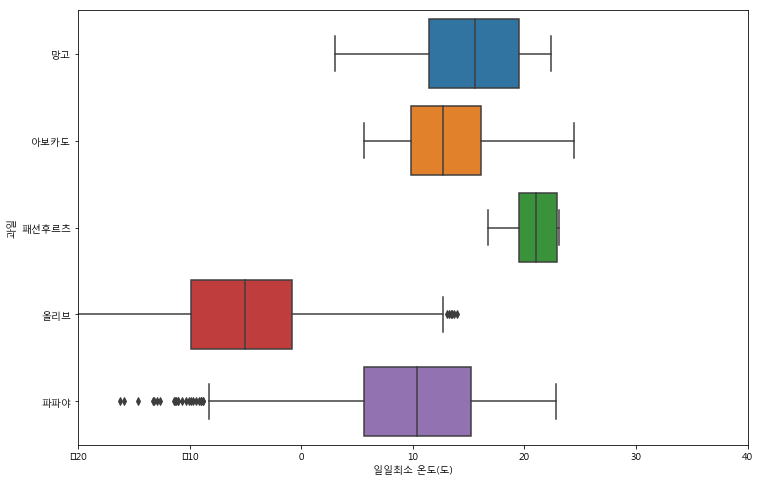

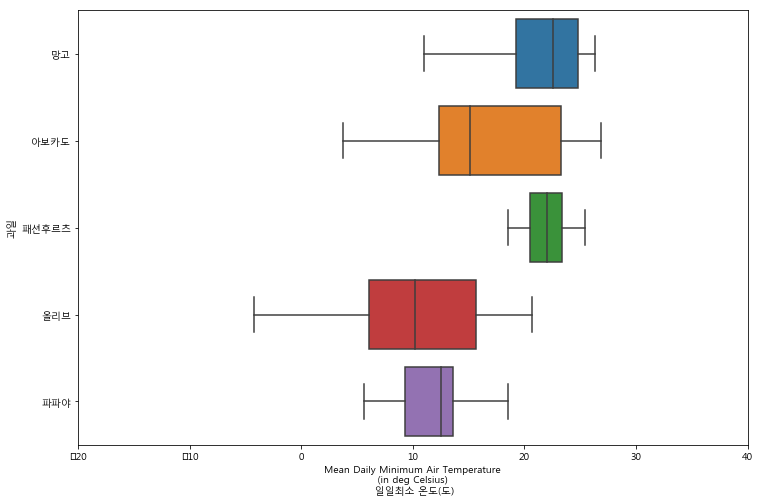

In [164]:
plt.figure(figsize = (12,8))
sns.boxplot(x = '일일최소 온도(도)', y = '과일', data = k_weather_inversed, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(-20, 40)
plt.show()
plt.figure(figsize = (12,8))
sns.boxplot(x = for_columns[2], y = '과일', data = data, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(-20, 40)
plt.show()

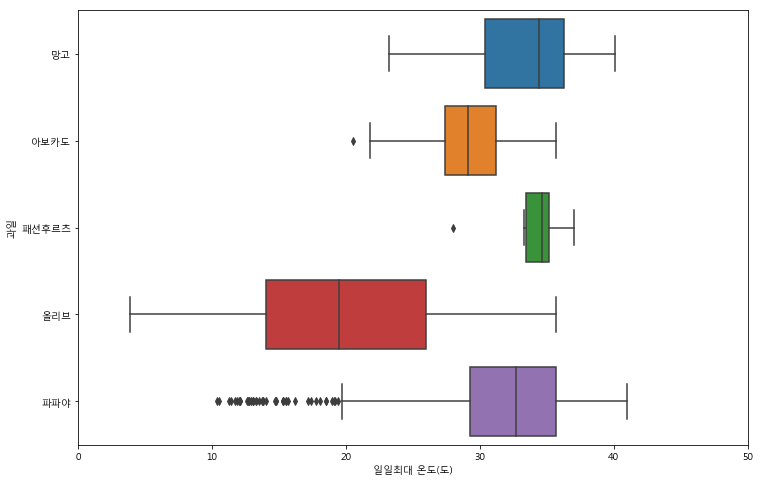

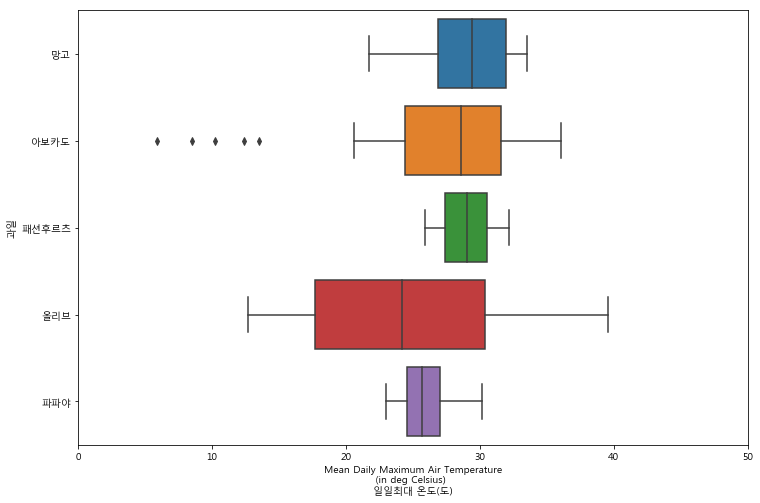

In [165]:
plt.figure(figsize = (12,8))
sns.boxplot(x = '일일최대 온도(도)', y = '과일', data = k_weather_inversed, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(0, 50)
plt.show()
plt.figure(figsize = (12,8))
sns.boxplot(x = for_columns[3], y = '과일', data = data, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(0, 50)
plt.show()

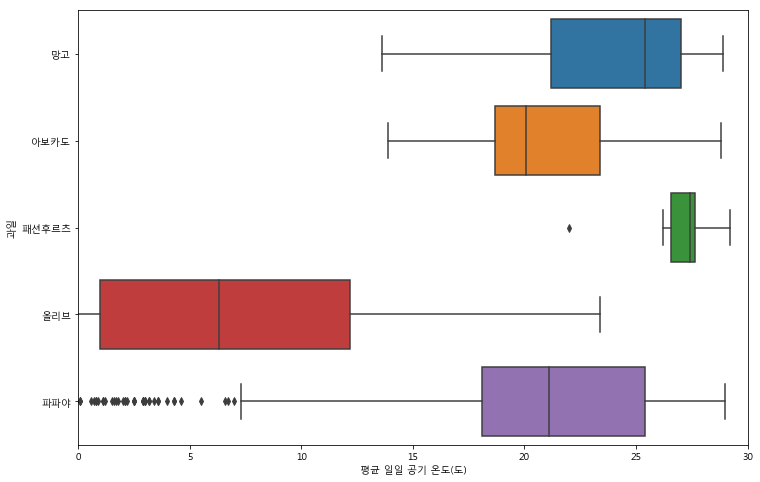

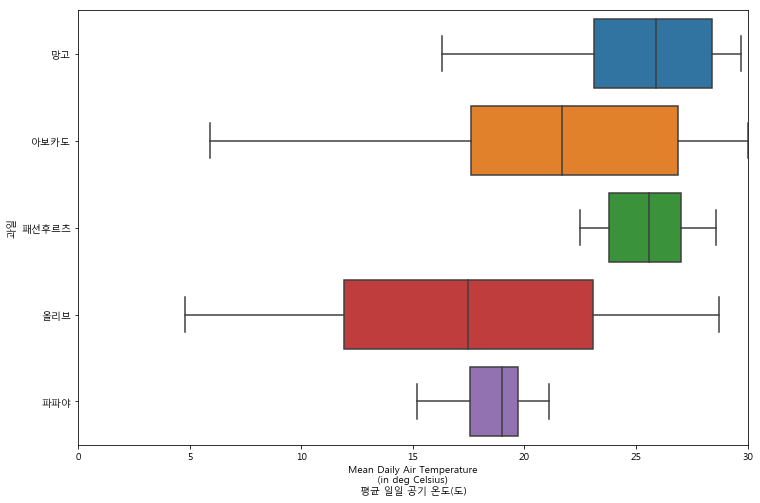

In [166]:
plt.figure(figsize = (12,8))
sns.boxplot(x = '평균 일일 공기 온도(도)', y = '과일', data = k_weather_inversed, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(0, 30)
plt.show()
plt.figure(figsize = (12,8))
sns.boxplot(x = for_columns[1], y = '과일', data = data, order=['망고','아보카도','패션후르츠','올리브','파파야'])
plt.xlim(0, 30)
plt.show()

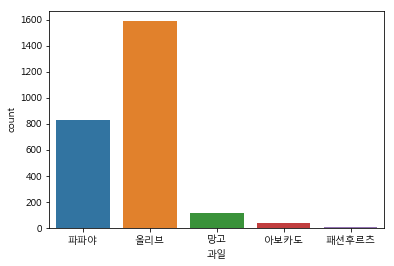

In [167]:
sns.countplot(k_weather_inversed['과일'])

In [168]:
pd.concat([pd.Series(k_weather_inversed['과일'].value_counts(), name='한국'), pd.Series(
data['과일'].value_counts(), name='외국')], axis= 1)

C:\Users\pc-05\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,한국,외국
망고,112,120
아보카도,38,238
올리브,1590,120
파파야,833,120
패션후르츠,8,240


- 올리브 - 15 - 28 = 13
- 파파야 - 15 - 30 = 15
- 망고 : 24 - 27 = 3
- 아보카도 - 20 - 27 = 7
- 패션 - 20 - 30 = 10

In [169]:
for fruit in k_weather_inversed['과일'].unique():
    print(fruit)
    print(k_weather_inversed[k_weather_inversed['과일']==fruit]['평균 일일 공기 온도(도)'].describe())
    print()

파파야
count    833.000000
mean      20.375030
std        6.116151
min       -1.400000
25%       18.100000
50%       21.100000
75%       25.400000
max       29.000000
Name: 평균 일일 공기 온도(도), dtype: float64

올리브
count    1590.000000
mean        6.722830
std         6.700625
min        -8.500000
25%         1.000000
50%         6.300000
75%        12.200000
max        23.400000
Name: 평균 일일 공기 온도(도), dtype: float64

망고
count    112.000000
mean      23.846429
std        3.902435
min       13.600000
25%       21.175000
50%       25.400000
75%       27.025000
max       28.900000
Name: 평균 일일 공기 온도(도), dtype: float64

아보카도
count    38.000000
mean     20.973684
std       3.825073
min      13.900000
25%      18.700000
50%      20.050000
75%      23.400000
max      28.800000
Name: 평균 일일 공기 온도(도), dtype: float64

패션후르츠
count     8.000000
mean     26.787500
std       2.122961
min      22.000000
25%      26.575000
50%      27.400000
75%      27.650000
max      29.200000
Name: 평균 일일 공기 온도(도), dtype: float